Importing libraries

In [1]:
%pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
%matplotlib inline
import tensorflow as tf 

loading dataset

In [3]:
dataset = pd.read_csv('Breast_Cancer.csv')

In [4]:
dataset.shape

(699, 11)

In [5]:
dataset.head()

,Code Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Margil Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [6]:
dataset.tail()

,Code Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Margil Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4
698,897471,4,8,8,5,4,5.0,10,4,1,4


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Code Number                  699 non-null    int64  
 1   Clump Thickness              699 non-null    int64  
 2   Uniformity of Cell Size      699 non-null    int64  
 3   Uniformity of Cell Shape     699 non-null    int64  
 4   Margil Adhesion              699 non-null    int64  
 5   Single Epithelial Cell Size  699 non-null    int64  
 6   Bare Nuclei                  683 non-null    float64
 7   Bland Chromatin              699 non-null    int64  
 8   Normal Nucleoli              699 non-null    int64  
 9   Mitoses                      699 non-null    int64  
 10  Class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


To check for unique value in the Label(Class) column. Key: 2-Malignant, 4-Christian

In [8]:
dataset['Class'].unique()

array([2, 4])

In [9]:
dataset.describe(include='all')

,Code Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Margil Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


Check to see if there is any missing values

In [10]:
dataset.isnull().sum()

Code Number                     0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Margil Adhesion                 0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

Using  numImputter to fill missing value using mean as strategy

In [11]:
numImputer = SimpleImputer(missing_values=np.nan, strategy='mean')
numImputer = numImputer.fit(dataset[['Bare Nuclei']])
dataset[['Bare Nuclei']] = numImputer.transform(dataset[['Bare Nuclei']])
dataset.isnull().sum()

Code Number                    0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Margil Adhesion                0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(*args, **kw)>

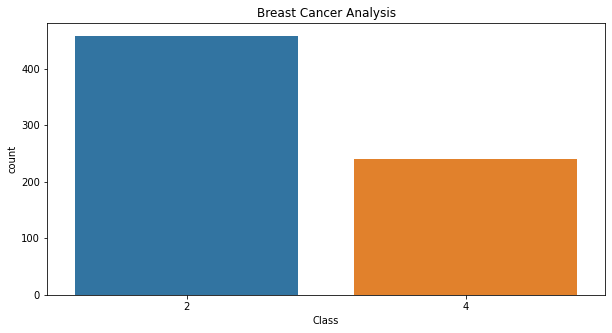

In [12]:
plt.figure(figsize=(10, 5))
sns.countplot(dataset.Class)
plt.title('Breast Cancer Analysis')
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


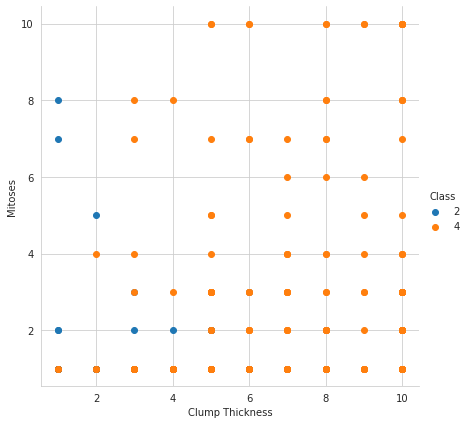

In [13]:
sns.set_style('whitegrid')
sns.FacetGrid(dataset, hue = 'Class', size = 6).map(plt.scatter, 'Clump Thickness', 'Mitoses').add_legend()

Determining the input feature and the class feature in the dataset

In [14]:
X = dataset.iloc[:, [1,2,3,4,5,6,7,8,9]].values
y = dataset.iloc[:, 10].values

Splitting the dataset into test and training dataset

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

Scaling the data Set

In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_s=sc.fit_transform(X_train)
X_test_s=sc.transform(X_test)

Training the model:
Using Keras

In [17]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(8, activation='relu', input_shape = (9,))) 
model.add(tf.keras.layers.Dense(8, activation = "sigmoid"))

In [18]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

Evaluating the model:
Predicting the Test set results

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 80        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
Total params: 152
Trainable params: 152
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(X_train_s, y_train, batch_size = 8, epochs = 50, verbose = 2, validation_split=0.2)

Epoch 1/50
49/49 - 1s - loss: 2.1632 - accuracy: 0.1739 - val_loss: 1.8537 - val_accuracy: 0.4592 - 968ms/epoch - 20ms/step
Epoch 2/50
49/49 - 0s - loss: 1.6892 - accuracy: 0.5141 - val_loss: 1.4321 - val_accuracy: 0.6735 - 93ms/epoch - 2ms/step
Epoch 3/50
49/49 - 0s - loss: 1.3130 - accuracy: 0.7442 - val_loss: 1.0929 - val_accuracy: 0.8673 - 86ms/epoch - 2ms/step
Epoch 4/50
49/49 - 0s - loss: 0.9947 - accuracy: 0.8849 - val_loss: 0.8034 - val_accuracy: 0.9592 - 72ms/epoch - 1ms/step
Epoch 5/50
49/49 - 0s - loss: 0.7218 - accuracy: 0.9284 - val_loss: 0.5680 - val_accuracy: 0.9694 - 84ms/epoch - 2ms/step
Epoch 6/50
49/49 - 0s - loss: 0.5109 - accuracy: 0.9616 - val_loss: 0.4038 - val_accuracy: 0.9898 - 98ms/epoch - 2ms/step
Epoch 7/50
49/49 - 0s - loss: 0.3728 - accuracy: 0.9719 - val_loss: 0.2965 - val_accuracy: 0.9898 - 116ms/epoch - 2ms/step
Epoch 8/50
49/49 - 0s - loss: 0.2854 - accuracy: 0.9744 - val_loss: 0.2287 - val_accuracy: 0.9898 - 110ms/epoch - 2ms/step
Epoch 9/50
49/49 - 0

In [21]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

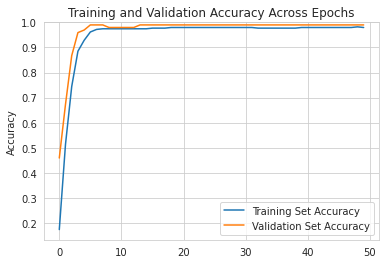

In [22]:
plt.plot(accuracy, label = 'Training Set Accuracy')
plt.plot(validation_accuracy, label = 'Validation Set Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

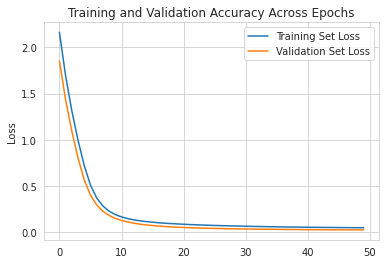

In [23]:
loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.plot(loss, label = 'Training Set Loss')
plt.plot(validation_loss, label = 'Validation Set Loss')
plt.ylabel('Loss')
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
y_pred = model.predict(X_test_s)
y_pred = y_pred.argmax(axis = 1)

7/7 [==============================] - 0s 2ms/step


In [26]:
confusion_matrix = confusion_matrix(y_test, y_pred)

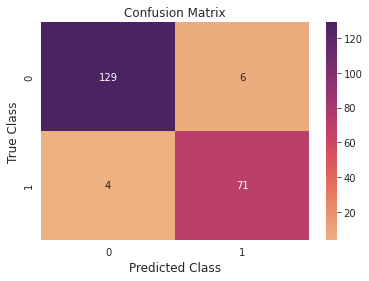

In [27]:
ax = sns.heatmap(confusion_matrix, cmap = 'flare', annot = True, fmt = 'd')
plt.xlabel("Predicted Class",fontsize=12) 
plt.ylabel("True Class",fontsize=12) 
plt.title("Confusion Matrix",fontsize=12) 
plt.show()

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.97      0.96      0.96       135
           4       0.92      0.95      0.93        75

    accuracy                           0.95       210
   macro avg       0.95      0.95      0.95       210
weighted avg       0.95      0.95      0.95       210

